# <center> Computational Intelligence Course Homework 1.1 </center>
# <center> Homework 1.1 : Linear Regression</center>

In this exercise, you will implement linear regression and get to see it work on data. <br>
Before we begin with the exercises, we need to import all libraries required for this programming exercise. Throughout the course, we will be using numpy for all arrays and matrix operations, and matplotlib for plotting.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

## Part 1: Univariable Linear Regression

Now you will implement linear regression with one variable to predict profits for a food truck. Suppose you are the CEO of a restaurant franchise and are considering different cities for opening a new outlet. The chain already has trucks in various cities and you have data for profits and populations from the cities. You would like to use this data to help you select which city to expand to next.

The file ex1data1.txt contains the dataset for our linear regression problem. The first column is the population of a city (in 10,000s) and the second column is the profit of a food truck in that city (in $10,000s). A negative value for profit indicates a loss.

### 1.2. Loading the Data

In [2]:
data = pd.read_csv("ex1data1.txt", header=None)
data.head()

,0,1
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


### 1.3. Plotting the Data
Before starting on any task, it is often useful to understand the data by visualizing it.

Text(0.5,1,'Profit Prediction')

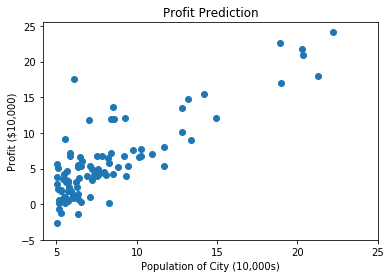

In [3]:
plt.scatter(data[0], data[1])
plt.xticks(np.arange(5,30, step=5))
plt.yticks(np.arange(-5,30, step=5))
plt.xlabel("Population of City (10,000s)")
plt.ylabel("Profit ($10,000)")
plt.title("Profit Prediction")

### 1.4. Cost and Gradient Descent

he objective of linear regression is to minimize the cost function: 
$$J(\Theta) = \frac{1}{2m} \sum_{i=1}^m (h_\Theta(x^{(i)}) - y^{(i)} )^2$$

where the hypothesis $h_\Theta(x)$ is given by the linear model:
$$h_\Theta(x) = \Theta^Tx$$

In [4]:
def computeCost(X,y,theta):
    """
    Take in a numpy array X,y, theta and generate the cost function of using theta as parameter
    in a linear regression model
    """
    m = len(y)  # number of training examples
    J = 0       # cost function
    
    # ====================== YOUR CODE HERE ======================
    M = (X.dot(theta) - y)
    J = (np.dot(M.transpose(), M) / (2 * m))[0,0]
    # ============================================================

    return J

In [5]:
data_n = data.values
m = data_n[:,0].size
X = np.append(np.ones((m,1)), data_n[:,0].reshape(m,1), axis=1)
y = data_n[:,1].reshape(m,1)

theta = np.zeros((2,1))

J = computeCost(X,y, theta)
print('cost value = ' + str(J));

cost value = 32.072733877455676


**Expected Output**: 

<table style="width:20%">
  <tr>
    <td>**cost value**</td>
    <td> 32.07</td> 
  </tr>
</table>

In [6]:
# further testing of the cost function

theta_1 = np.array([-1, 2]).reshape((2,1))
J = computeCost(X, y, theta_1);
print('cost value = ' + str(J));

cost value = 54.24245508201238


**Expected Output**: 

<table style="width:20%">
  <tr>
    <td>**cost value**</td>
    <td>54.24</td> 
  </tr>
</table>

### 1.5. Gradient Descent

Minimize the cost function $J(\Theta)$ by updating the following equation and repeat unitil convergence:
        
$$\Theta_j := \Theta_j - \alpha \frac{1}{m} \sum_{i=1}^m (h_{\Theta}(x^{(i)}) - y^{(i)})x_j^{(i)}$$ simultaneously update $\Theta_j$ for all $j$.

With each step of gradient descent, your parameters $\theta_j$ come closer to the optimal values that will achieve the lowest cost J($\theta$). <br><br>
As you perform gradient descent to learn minimize the cost function $J(\theta)$, it is helpful to monitor the convergence by computing the cost. In this section, you will implement a function to calculate $J(\theta)$ so you can check the convergence of your gradient descent implementation.

In [7]:
def gradientDescent(X,y,theta,alpha,num_iters):
    """
    Take in numpy array X, y and theta and update theta by taking num_iters gradient steps
    with learning rate of alpha
    
    return theta and the list of the cost of theta during each iteration
    """
    
    m = len(y)
    J_history = []
    
    for i in range(num_iters):
        # ====================== YOUR CODE HERE ======================
        sigma = np.dot((X.transpose()) , (X.dot(theta) - y))
        theta = theta - (alpha * (sigma)) / (m)
        
        J_history.append(computeCost(X, y, theta))
        # ============================================================
        
    return theta, J_history

In [8]:
theta, J_history = gradientDescent(X, y, theta, 0.01, 1500)
print("h(x) ="+str(round(theta[0,0],2))+" + "+str(round(theta[1,0],2))+"x1\n")
print('theta = ' + str(theta))

h(x) =-3.63 + 1.17x1

theta = [[-3.63029144]
 [ 1.16636235]]


**Expected Output**: 

<table style="width:20%">
  <tr>
    <td>**theta**</td>
    <td> [[-3.6303][1.1664]] </td>
    </tr>
</table>

### 1.6. Visualising the Cost Function $J(\Theta)$

To understand the cost function $J(\theta)$ better, you will now plot the cost over a 2-dimensional grid of $\theta_0$ and $\theta_1$ values. You will not need to code anything new for this part, but you should understand how the code you have written already is creating these images.<br>
The cost function $J(\theta)$ is bowl-shaped and has a global minimum.


In [9]:
#Generating values for theta0, theta1 and the resulting cost value
theta0_vals=np.linspace(-10,10,100)
theta1_vals=np.linspace(-1,4,100)
J_vals=np.zeros((len(theta0_vals),len(theta1_vals)))

for i in range(len(theta0_vals)):
    for j in range(len(theta1_vals)):
        t=np.array([theta0_vals[i],theta1_vals[j]])
        J_vals[i,j]=computeCost(X,y,t)

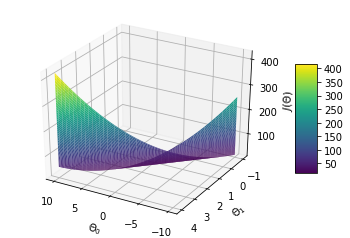

In [10]:
#Generating the surface plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(theta0_vals, theta1_vals, J_vals, cmap='viridis')
fig.colorbar(surf, shrink=0.5, aspect=5)
ax.set_xlabel("$\Theta_0$")
ax.set_ylabel("$\Theta_1$")
ax.set_zlabel("$J(\Theta)$")

#rotate for better angle
ax.view_init(30,120)

### 1.7. Testing the implementation

Plot $J(\Theta)$ against the number of iteration 

Text(0.5,1,'Cost function using Gradient Descent')

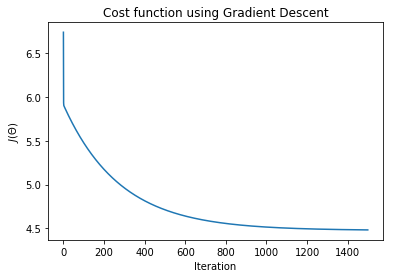

In [11]:
plt.plot(J_history)
plt.xlabel("Iteration")
plt.ylabel("$J(\Theta)$")
plt.title("Cost function using Gradient Descent")

### 1.8. Plot the linear fit

Text(0.5,1,'Profit Prediction')

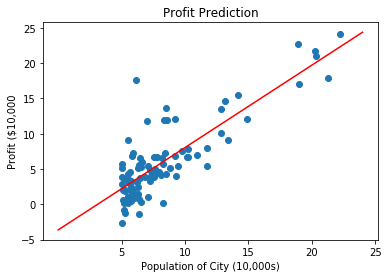

In [12]:
plt.scatter(data[0],data[1])
x_value=[x for x in range(25)]
y_value=[y*theta[1]+theta[0] for y in x_value]
plt.plot(x_value,y_value,color="r")
plt.xticks(np.arange(5,30,step=5))
plt.yticks(np.arange(-5,30,step=5))
plt.xlabel("Population of City (10,000s)")
plt.ylabel("Profit ($10,000")
plt.title("Profit Prediction")

### 1.9. Make predictions using the optimized $\Theta$ values

Your final values for $\Theta$ will also be used to make predictions on profits in areas of 35,000 and 70,000 people:<br>
$$h_\Theta(x) = \Theta^Tx$$

In [13]:
def predict(x, theta):
    """
    Takes in numpy array of x and theta and return the predicted value of y based on theta
    """
    
    predictions = np.dot(theta.transpose(),x)
    
    return predictions[0]

In [14]:
predict1 = predict(np.array([1,3.5]), theta) * 10000
print("For population = 35,000, we predict a profit of $" + str(round(predict1, 0)))

predict2 = predict(np.array([1,7]),theta)*10000
print("For population = 70,000, we predict a profit of $" + str(round(predict2, 0)) + "\n\n")

For population = 35,000, we predict a profit of $4520.0
For population = 70,000, we predict a profit of $45342.0




## Part 2: Multivariable Linear Regression
In this part, you will implement linear regression with multiple variables to predict the prices of houses. Suppose you are selling your house and you want to know what a good market price would be. One way to do this is to first collect information on recent houses sold and make a model of housing prices.

### 2.1. Loading the Data
The file ex1data2.txt contains a training set of housing prices in Portland, Oregon. The first column is the size of the house (in square feet), the second column is the number of bedrooms, and the third column is the price of the house.

In [15]:
data2=pd.read_csv("ex1data2.txt", header=None)
data2.head()

,0,1,2
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


### 2.2. Plotting the Data

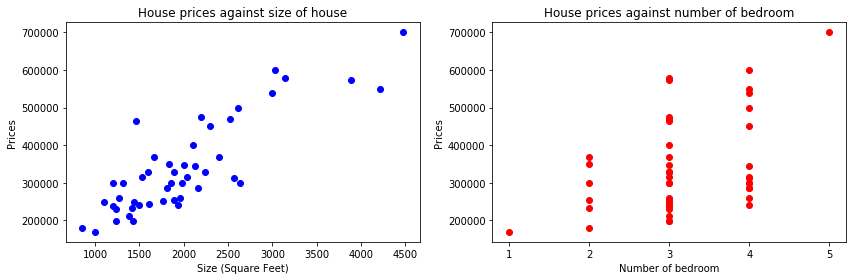

In [16]:
# Create 2 subplot, 1 for each variable
fig, axes = plt.subplots(figsize=(12,4),nrows=1,ncols=2)

axes[0].scatter(data2[0],data2[2],color="b")
axes[0].set_xlabel("Size (Square Feet)")
axes[0].set_ylabel("Prices")
axes[0].set_title("House prices against size of house")
axes[1].scatter(data2[1],data2[2],color="r")
axes[1].set_xlabel("Number of bedroom")
axes[1].set_ylabel("Prices")
axes[1].set_xticks(np.arange(1,6,step=1))
axes[1].set_title("House prices against number of bedroom")

# Enhance layout
plt.tight_layout()

### 2.3. Feature Normalization

By looking at the data values, note that house sizes are about 1000 times the number of bedrooms. When features differ by orders of magnitude, first performing feature scaling can make gradient descent converge much more quickly.

To make sure features are on a similar scale:

$$x_i = \frac{x_i - \mu_i}{\sigma_i}$$

In [17]:
def featureNormalization(X):
    
    """
    Take in numpy array of X values and return normalize X values,
    the mean and standard deviation of each feature
    """
    # ====================== YOUR CODE HERE ======================
    X_norm = X;
    mean = np.mean(X, axis = 0)
    std = np.std(X, axis = 0)
    
    
    X_norm = (X - mean) / std

    # ============================================================
    
    return X_norm , mean , std

In [18]:
data_n2 = data2.values
m2 = len(data_n2[:,-1])
X2 = data_n2[:,0:2].reshape(m2,2)
X2, mean_X2, std_X2 = featureNormalization(X2)
X2 = np.append(np.ones((m2,1)),X2,axis=1)
y2 = data_n2[:,-1].reshape(m2,1 )
theta2 = np.zeros((3,1))

### 2.4. Compute Cost $J(\Theta)$
Previously, you implemented gradient descent on a univariate regression problem. The only difference now is that there is one more feature in the matrix $X$. The hypothesis function and the batch gradient descent update rule remain unchanged.

In the multivariate case, the cost function can also be written in the following vectorized form:

$$J(\Theta) = \frac{1}{2m} (X\Theta - \overrightarrow{y})^T (X\Theta - \overrightarrow{y})$$


Your code in the previous part (single variable) should supports multiple variables, so can use it here too.

In [19]:
J = computeCost(X2,y2,theta2)
print('cost value = ' + str(J));

cost value = 65591548106.45744


**Expected Output**: 

<table style="width:20%">
  <tr>
    <td>**cost value**</td>
    <td>65591548106.46</td> 
  </tr>
</table>

### 2.5. Gradient Descent

In [20]:
theta2, J_history2 = gradientDescent(X2,y2,theta2,0.1,400)
print("h(x) ="+str(round(theta2[0,0],2))+" + "+str(round(theta2[1,0],2))+"x1 + "+str(round(theta2[2,0],2))+"x2\n")
print('theta = ' + str(theta2))

h(x) =340412.66 + 109447.8x1 + -6578.35x2

theta = [[340412.65957447]
 [109447.79558639]
 [ -6578.3539709 ]]


**Expected Output**: 

<table style="width:20%">
  <tr>
    <td>**theta**</td>
    <td> [[340412.66][109447.8][-6578.35]] </td>
    </tr>
</table>

### 2.6. Visualising the Cost Function $J(\Theta)$

Text(0.5,1,'Cost function using Gradient Descent')

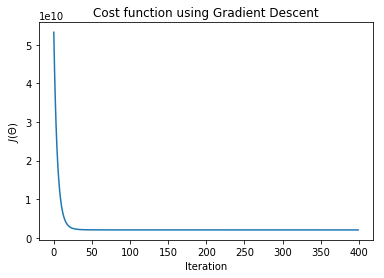

In [21]:
plt.plot(J_history2)
plt.xlabel("Iteration")
plt.ylabel("$J(\Theta)$")
plt.title("Cost function using Gradient Descent")

### 2.7. Make predictions using the optimized $\Theta$ values
Next, use this value of $\theta$ to predict the price of a house with 1650 square feet and 3 bedrooms:

In [22]:
price = 0; # You should change this

# ====================== YOUR CODE HERE ======================
X_test = [1650, 3]
X_test = np.array(X_test)
X_test = (X_test - mean_X2) / std_X2
X_test = np.append(np.ones(1), X_test)
price = predict(X_test, theta2)

# ============================================================
    
print("For size of house = 1650, Number of bedroom = 3, we predict a house value of $"+str(round(price,0)))

For size of house = 1650, Number of bedroom = 3, we predict a house value of $293081.0


**Expected Output**: 

<table style="width:20%">
  <tr>
    <td>**price**</td>
    <td> $456439.0 </td>
    </tr>
</table>